# 문제
- 불법 대부업 데이터 폴더에는 모두 대출과 관련된 내용이나,정부로부터 인가받은 업체가 홍보한 합법적인 글(class0)과 인가받지 않은 업체가 홍보한 불법적인 글(class1)이 있다.
- 두 데이터를 합쳐 학습 데이터와 테스트 데이터를 7.5:2.5의 비율로 분리하고 딥러닝을 이용하여 분류 모델을 생성하시오
- 층의 개수와 활성화 함수, 배치 사이즈 등을 조절하여 최적의 모델을 만드시오


# 데이터 준비하기 & 형태소 분석

In [1]:
import pandas as pd

def read_data(filename, encoding='cp949', start=1):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[start:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

path = '/Users/jsha/gjai/nlp/pytest/'
file1 = 'class0(대출_합법).csv'
file2 = 'class1(대출_불법).csv'


df0 = pd.read_csv(path+file1, encoding='cp949')
df1 = pd.read_csv(path+file2, encoding='cp949')

In [2]:
df0.head()

,Content,Label
0,그라나다 할부 조건 시간 전국 어디 중고차 할부 가능 여부 서비스 상담 신청 양식 ...,class0
1,광고 광고 올해 통신 인터넷 보이스 피싱 메모리 해킹 사기 피해 건수 피해액 최민희...,class0
2,춘천 연합뉴스 이해 기자 강원도 교육청 올해 보급 예정 교과서 전자 보이스 피싱 사...,class0
3,조선족 보이스 피싱,class0
4,조선족 보이스 피싱,class0


In [3]:
df1.head()

,Content,Label
0,저지 레드 다중 과다 채무자 증가 카드 대출 연체 증가,class1
1,히트 로드 채팅 싸이트 은행 신협 고객 연체 이자 부담,class1
2,보이스 피싱 아우 짜증 이제 그쪽 전화 보이스 피싱 진드기 사람 매트리스 사용,class1
3,보이스 피싱 아우 짜증 이제 그쪽 전화 보이스 피싱 진드기 사람 매트리스 사용,class1
4,보이스 피싱 아우 짜증 이제 그쪽 전화 보이스 피싱 진드기 사람 매트리스,class1


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  2985 non-null   object
 1   Label    2985 non-null   object
dtypes: object(2)
memory usage: 46.8+ KB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1413 non-null   object
 1   Label    1413 non-null   object
dtypes: object(2)
memory usage: 22.2+ KB


In [6]:
df0.describe()

,Content,Label
count,2985,2985
unique,1794,1
top,한신 보증 회사채 신용 등급 안정 평가,class0
freq,222,2985


In [7]:
df1.describe()

,Content,Label
count,1413,1413
unique,581,1
top,개인 회생 신용 불량 신협 아파트 담보 대출 출처 네이버,class1
freq,202,1413


In [8]:
df = pd.concat([df0, df1], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  4398 non-null   object
 1   Label    4398 non-null   object
dtypes: object(2)
memory usage: 103.1+ KB


In [9]:
df.tail()

,Content,Label
1408,연체 당일 소액 전마 전국 출장,class1
1409,휴대폰 소액 결제 문의 입금 통신사 지급 미납 정책 급전 문의,class1
1410,뉴스 기사 직장인 서류 케이블 방송 신용 대출 광고 대출 금액 상환금 직장인 소득 ...,class1
1411,과다 조회 과다 대출 대출 누구 신용 등급 승인 보장 무직자 대출 작업대,class1
1412,휴대폰 소액 결제 서비스 문의 입금 발신 가능 문의 통신사 지급 미납 정책 급전 문...,class1


In [10]:
df['Label'] = df['Label'].map({'class0':'합법', 'class1':'불법'})
df.tail()

,Content,Label
1408,연체 당일 소액 전마 전국 출장,불법
1409,휴대폰 소액 결제 문의 입금 통신사 지급 미납 정책 급전 문의,불법
1410,뉴스 기사 직장인 서류 케이블 방송 신용 대출 광고 대출 금액 상환금 직장인 소득 ...,불법
1411,과다 조회 과다 대출 대출 누구 신용 등급 승인 보장 무직자 대출 작업대,불법
1412,휴대폰 소액 결제 서비스 문의 입금 발신 가능 문의 통신사 지급 미납 정책 급전 문...,불법


## train - test 데이터 분리하기

In [11]:
data_text = df['Content'].to_list()
print(len(data_text))
print(data_text[0])

4398
그라나다 할부 조건 시간 전국 어디 중고차 할부 가능 여부 서비스 상담 신청 양식 성명 핸드폰 번호 상담가 시간 기재


In [12]:
data_class = df['Label'].to_list()
print(len(data_class))
print(data_class[0])
print(data_class[-1])

4398
합법
불법


In [13]:
from sklearn.model_selection import train_test_split

train_data_text, test_data_text, train_data_class, test_data_class = \
train_test_split(data_text, data_class, stratify=data_class, random_state=11)

In [14]:
from collections import Counter
train_data_class_freq = Counter(train_data_class)
print('train_data_class_freq:', train_data_class_freq)

test_data_class_freq = Counter(test_data_class)
print('test_data_class_freq:', test_data_class_freq)


train_data_class_freq: Counter({'합법': 2238, '불법': 1060})
test_data_class_freq: Counter({'합법': 747, '불법': 353})


## 텍스트 길이 통계 분석하기

In [15]:
import numpy as np
text_len = [len(line.split(' ')) for line in train_data_text]

print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.mean(text_len))
print('중위수길이:', np.median(text_len))
print('percentile 범위', [0, 25, 50, 75, 90, 100])
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])


최소길이: 2
최대길이: 20
평균길이: 12.674651303820497
중위수길이: 11.0
percentile 범위 [0, 25, 50, 75, 90, 100]
구간별 최대 길이: [ 2.  8. 11. 20. 20. 20.]
최소길이 문장: 보증 고시
최대길이 문장: 뉴스 기사 스마트폰 요금 요새 회사원 최근 자신 휴대폰 명세서 내역 무료 통화 무료 문자 이용 금액 여기 명세서 극장


# 1단계 - Tokenizing
- 특정 단어에 인덱싱을 부여하는 작업
- 최대 몇개의 인덱싱을 부여할지는 num_words 옵션으로 선택
- 3단계 원-핫 인코딩 때 num_words를 쓸건데, 이걸 쓸려면 최소 이 수만큼 인덱싱은 부여되어야 한다.

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words = 10000
maxlen = 20

tokenizer = Tokenizer(num_words=max_words) # 10000개 컬럼의 틀을 갖는 토크나이저 생성
tokenizer.fit_on_texts(train_data_text) # train_data_text 전체에 대하여 빈도수에 따라 단어를 인덱싱하는 작업. 모든 단어 수가 600000개면 인덱싱도 이 수만큼 일어난다.
word_index = tokenizer.word_index #인덱싱 번호를 출력해 보면 22136이 나온다.

Using TensorFlow backend.


In [17]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index type:', type(word_index))
print('word_index:', word_index)
# 주목할 것은 word_index가 1부터 시작한다는 거다. 0은?? 이건 나중에 padding을 위해 사용된다.

전체에서 3305개의 고유한 토큰을 찾았습니다.
word_index type: <class 'dict'>
word_index: {'보증': 1, '신용': 2, '대출': 3, '등급': 4, '평가': 5, '시간': 6, '안정': 7, '할부': 8, '중고차': 9, '가능': 10, '불량': 11, '피싱': 12, '보이스': 13, '담보': 14, '네이버': 15, '원룸': 16, '한기평': 17, '전국': 18, '상담': 19, '연체': 20, '서비스': 21, '핸드폰': 22, '신청': 23, '아파트': 24, '번호': 25, '여부': 26, '어디': 27, '양식': 28, '성명': 29, '상담가': 30, '사동': 31, '출처': 32, '사채': 33, '옵션': 34, '개인': 35, '회사채': 36, '기재': 37, '회생': 38, '한신': 39, '신협': 40, '스마트폰': 41, '개통': 42, '단기': 43, '사금융': 44, '통신': 45, '직장인': 46, '금리': 47, '중고': 48, '잠실': 49, '임대': 50, '연락': 51, '기업': 52, '장기': 53, '부평': 54, '가격': 55, '은행': 56, '신규': 57, '금융채': 58, '이제': 59, '전화': 60, '송파구': 61, '사용': 62, '렌트': 63, '금융': 64, '사람': 65, '햇살론': 66, '현금': 67, '블로그': 68, '천안': 69, '짜증': 70, '진드기': 71, '안산': 72, '한양대': 73, '아우': 74, '그쪽': 75, '한국': 76, '서울': 77, '서민': 78, '예방': 79, '카드': 80, '사례': 81, '매매': 82, '뉴스': 83, '인터넷': 84, '매트리스': 85, '당일': 86, '미납': 87, '저축': 88, '본인': 89, '캐피탈': 90, '광주': 91, '어음'

In [18]:
data = tokenizer.texts_to_sequences(train_data_text) # train data에 Tokenizer 적용
# 이제야 토크나이저 maxlen의 10000의 1이 적은 9999이 적용된다. indexing한 결과를 바탕으로 상위 9999개만 가져온다.
# 1 적은 이유는 이 1이 나중 원핫인코딩의 10000개 컬럼 중 0번째, 패딩 자리가 될터이다. 
# 그리고 각 데이터의 문자를 보고 해당 수를 넣는다.
# 만약 인덱싱 9999안에 속하지 않은 문자는 그냥 제거한다.

print('data 0:', data[0])
print('texts 0:', train_data_text[0])

data 0: [72, 1, 379, 359, 149, 114, 305, 34, 1, 16]
texts 0: 안산 보증 상록 구청 인근 신축 입주 옵션 보증 원룸


# padding
- 모든 문장의 길이를 맞추기 위한 과정.
- 패딩에서 문장 길이를 맞추고 원핫인코딩을 하는데, 원핫인코딩에서 max_words를 10000개로 늘리기 때문에 이 과정이 크게 의미가 없는 것이다.
- 실은 여기에서는 굳이 필요한 작업은 아닌데, 나중 RNN에서는 필요하다.


In [19]:
data = pad_sequences(data, maxlen=maxlen) 
# 우리는 maxlen은 20으로 줬기 때문에, 이보다 크면 뒤를 잘라내고, 작으면 앞에서부터 0을 패딩으로 넣고, 중요한 단어는 뒤로 보낸다.
# padding = 'pre'가 기본값. 'post'로 하면 뒤에 0을 채운다.
# truncating = 'pre' 가 기본값. 'post'를 하면 maxlen을 넘는 경우 문장의 뒤를 자른다.
print('data:', data)
print('data 0:', data[0])
print('data 0의 길이:', len(data[0]))

data: [[   0    0    0 ...   34    1   16]
 [   0    0    0 ...   44   67  250]
 [   0    0    0 ...    4    7    5]
 ...
 [   0    0    0 ...    2   11  202]
 [  69  149  562 ... 1159   69    1]
 [  13   12 1002 ...  353  120 1719]]
data 0: [  0   0   0   0   0   0   0   0   0   0  72   1 379 359 149 114 305  34
   1  16]
data 0의 길이: 20


# One-Hot Encoding
- 원핫인코딩을 하고나면, 문장의 어순 정보가 소실된다.
    - 그러나 RNN에서는 어순 정보를 살린다. 단어의 발생 순서를 고려한다.
    - 처음엔 어순이 중요치 않다고 생각했다. bag of words.
    - 요즘엔 transformer가 핫한데, 이건 단어의 발생순서보다 단어의 중요도, attention에 더 주목한다.
- 또 한가지 더. 빈도수 정보가 사라진다.

- 원-핫 인코딩의 특징: 0을 활용한다는 점. 이게 신경망의 입력층으로 들어가면 초기 가중치와 곱해져서 다음 층으로 전달되는데, 입력층에서 노드가 0으로 설정되면 이 단어의 영향력은 없고 다음층으로 전달되지 않는다. 이게 참 멋지다.
- 언제 원핫 인코딩을 쓰는가? 수치가 이닌 카테고리컬 특징을 컴터가 연산을 할 수 있도록 도와준다. 그 특징의 내용이 모델에서 영향을 주면 1, 아니면 0으로 설정된다.


## One-Hot Encoding

In [20]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_class)
train_data_class2 = le.transform(train_data_class)

In [21]:
print(train_data_class[-5:])
print(train_data_class2[-5:])

['합법', '합법', '불법', '합법', '합법']
[1 1 0 1 1]


In [22]:
data = to_one_hot(data, dimension=max_words)
labels = np.asarray(train_data_class2).astype('float32')

In [23]:
print(type(train_data_text))
print(type(data))
print(data.shape)

print('데이터 텐서의 차원:', data.ndim)
print('레이블 텐서의 차원:', labels.ndim)

print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

<class 'list'>
<class 'numpy.ndarray'>
(3298, 10000)
데이터 텐서의 차원: 2
레이블 텐서의 차원: 1
데이터 텐서의 크기: (3298, 10000)
레이블 텐서의 크기: (3298,)


# 모델 설계

## 훈련데이터, 훈련데이터에서의 검증데이터, 테스트데이터
- 검증데이터
    - 훈련 시 각 에포크가 끝날때마다 모델의 성능을 테스트 하는 데이터
    - 에포크가 진행되면서 모델의 성능이 좋아질수도 낮아질수도 있는데 그때마다 검증용으로 사용됨.
    - keras 모델 만들 때 설정할 수 있었던 것 같은데.
- 테스트데이터
    - 모든 훈련이 끝나고 선택된 최종 모델에 대해 성능을 검증하는 데이터
    - 함수 train_test_split() 이용해서 분리. 특히 분류에서는 stratify 옵션을 사용함.
    

In [24]:
validation_ratio = 0.3
validation_len = math.floor(len(train_data_text) * validation_ratio)

x_train = data[validation_len:]
y_train = labels[validation_len:]
x_val = data[:validation_len]
y_val = labels[:validation_len]

print(len(x_train))
print(len(x_val))

2309
989


In [66]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(max_words,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_17 (Dense)             (None, 26)                1326      
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 216       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 1,006,701
Trainable params: 1,006,701
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=50,
                    validation_data=(x_val, y_val))
history_dict = history.history

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['acc'])

save_path = '/Users/jsha/gjai/nlp/pytest/temp_binary_model/'
modelpath = save_path+'{epoch:d}-{val_loss:.4f}.h5'
# # modelpath = save_path+'my_model.h5'

from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=5, batch_size=20,
         validation_data=(x_val, y_val), verbose=1, callbacks=[checkpointer])
history_dict = history.history

Train on 2309 samples, validate on 989 samples
Epoch 1/20
2309/2309 [==============================] - 2s 711us/step - loss: 0.4360 - acc: 0.8735 - val_loss: 0.1231 - val_acc: 0.9808
Epoch 2/20
2309/2309 [==============================] - 1s 329us/step - loss: 0.0470 - acc: 0.9887 - val_loss: 0.0585 - val_acc: 0.9767
Epoch 3/20
2309/2309 [==============================] - 1s 329us/step - loss: 0.0072 - acc: 0.9987 - val_loss: 0.0635 - val_acc: 0.9788
Epoch 4/20
2309/2309 [==============================] - 1s 327us/step - loss: 0.0030 - acc: 0.9996 - val_loss: 0.0695 - val_acc: 0.9757
Epoch 5/20
2309/2309 [==============================] - 1s 327us/step - loss: 0.0020 - acc: 0.9991 - val_loss: 0.0755 - val_acc: 0.9767
Epoch 6/20
2309/2309 [==============================] - 1s 344us/step - loss: 0.0022 - acc: 0.9996 - val_loss: 0.0797 - val_acc: 0.9757
Epoch 7/20
2309/2309 [==============================] - 1s 339us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0851 - val_acc: 0.9717
E

In [76]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Train accuracy of each epoch:', np.round(acc,3))
print('Validation accuracy of each epoch:', np.round(val_acc,3))

Train accuracy of each epoch: [1.    1.    1.    0.999 1.   ]
Validation accuracy of each epoch: [0.973 0.972 0.974 0.973 0.97 ]


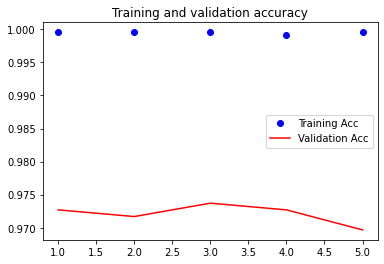

In [77]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

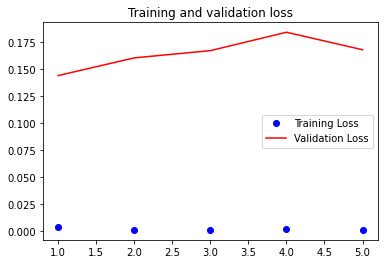

In [78]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 주의사항
- 1. 여기서 주어진 epoch에서 최고의 성능을 내는 parameter의 모델을 찾아.
    - validation data에서 최고의 성능을 내는 epoch 수를 확인하고 다시 모델을 돌려야 해.
    - 그리고 나서 저장을 한다. 하지만 일단 여기서는 생략하고 지금 이 모델을 저장하겠다.
- 2. 다른 방법: checkpointer
    - keras의 checkpointer를 사용하면, 쉽게 최적의 모델이 베스트 모델이라 가정하고 저장해 준다.
    - 저장된 모델 중 가장 마지막 번호를 찾으면 된다.
    - 아래 코드를 참조

In [79]:
# model.compile(loss='binary_crossentropy', optimizer='adam',
#              metrics=['acc'])

# modelpath = save_path+'{epoch:d}-{val_loss:.4f}.h5'
# # modelpath = save_path+'my_model.h5'

# from keras.callbacks import ModelCheckpoint
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
#                               verbose=1, save_best_only=True)
# model.fit(X_train, y_train, epochs=100, batch_size=5,
#          validation_split=0.2, verbose=1, callbacks=[checkpointer])

In [80]:
import os


if not os.path.exists(save_path):
    os.makedirs(save_path)

# model.save(save_path+'12_연습문제1.h5')

import pickle
with open(save_path+'12_연습문제1_text_binary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open(save_path+'12_연습문제1_LabelEncoder.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 테스트 데이터로 모델 테스트하기

In [67]:
import os
from keras.models import load_model

save_path = '/Users/jsha/gjai/nlp/pytest/temp_binary_model/'

loaded_model = load_model(save_path+'5-0.1784.h5')
print('model loaded:', loaded_model)

with open(save_path+'12_연습문제1_text_binary_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
    
with open(save_path+'12_연습문제1_LabelEncoder.pickle', 'rb') as handle:
    loaded_le = pickle.load(handle)


model loaded: <keras.engine.sequential.Sequential object at 0x7fafd8c95450>


In [68]:
# print(test_data_text)
# print(test_data_senti)

### 원-핫 인코딩을 하면서 소실되는 것 2가지는 무엇일까?
- 어순 정보: 단어에 할당되는 번호는 빈도에 의해 결정되는데, 원-핫 인코딩은 이 빈도 순에 따라 열번호를 나열한다. 그러나 실제 문장의 어순은 이 번호를 따르지 않기 때문에 원-핫 인코딩에서는 어순을 표현할 수 없다.
- 빈도 정보: 각 문장에서 등장하는 단어가 원-핫 인코딩의 컬럼 정보에 맞추어 등장하면 1, 등장하지 않으면 0으로 표현한다. 빈도수를 표현하는 다른 수단이 없다. 원-핫 인코딩에서는 등장 유무에 따라 0과 1로만 표현하기 때문이다.

### 불러온 tokenizer를 가지고 fit_on_texts(test_data_text)를 하면 안되는 이유는?
- fit_on_texts() 함수는 들어오는 문장에 대해 단어 빈도에 따라 단어에 인덱싱을 할당하는 역할을 한다. 즉, 불러온 tokenizer를 세팅하는 절차인데, 이 절차는 이미 train_data_text로 진행했고, tokenizer의 세팅이 끝났다.
- 여기에서 다시 fit_on_texts()를 하면 tokenizer가 다시 세팅되기 때문에(새로운 DTM header가 세팅되기 때문에) 이전에 세팅된 tokenizer를 이용하고 이 과정이 포함된 model을 테스트 하는 것이 의미가 없어진다.
- 즉, train_data_text와 test_data_text를 동일한 세팅의 tokenizer를 사용해야 한다.

In [69]:
data = loaded_tokenizer.texts_to_sequences(test_data_text)

In [70]:
data = pad_sequences(data, maxlen=maxlen)

In [71]:
x_test = to_one_hot(data, dimension=max_words)

In [72]:
test_data_class2 = loaded_le.transform(test_data_class)
print(test_data_class[:5])
print(test_data_class2[:5])

y_test = np.asarray(test_data_class2).astype('float32')


['합법', '불법', '합법', '합법', '합법']
[1 0 1 1 1]


In [73]:
test_eval = loaded_model.evaluate(x_test, y_test)

1100/1100 [==============================] - 0s 268us/step


In [74]:
print('prediction model loss:', format(test_eval[0], '.3f'))
print('prediction model acc:', format(test_eval[1], '.3f'))

prediction model loss: 0.256
prediction model acc: 0.965
